In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler


import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.formula.api import logit

# 1. Import Data

## 1.1 Control Variables

In [86]:
def ConvertConVarTab(df, value_col_name):
  df = pd.melt(df, id_vars = ['Country Name'], value_vars = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,  2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], var_name = 'year', value_name = value_col_name)
  return df

ConVarTabs = ['GDPGR', 'GDPPC' , 'IFR' , 'IR', 'XM' , 'M2R', 'CPGDP', 'CG', 'CPG', 'CPI']

ConVar = pd.DataFrame()

for i in range(len(ConVarTabs)):
  df = pd.read_excel('Control Variables.xlsx', ConVarTabs[i])
  df = ConvertConVarTab(df, ConVarTabs[i])
  if i == 0:
    ConVar = df
  else:
    ConVar = pd.concat([ConVar, df.iloc[:,2]], axis=1)


In [212]:
ConVar['Country Name'].nunique()

31

## 1.2 Capital Controls Variables

In [91]:
CapConVar = pd.read_excel('F_CC.xlsx', 'kai and kao(self)')

In [92]:
CapConVar = CapConVar.iloc[:, 2:]

In [93]:
CapConVar

,eqi,eqo,dbi,dbo,fii,fio,kai,kao
0,0.0,1.0,0.0,2.0,0,0,0.000000,0.333333
1,0.0,1.0,0.0,0.0,0,0,0.777778,0.666667
2,0.0,1.0,0.0,1.0,0,0,0.500000,0.583333
3,0.0,1.0,0.0,1.5,1,0,1.000000,0.833333
4,0.0,1.0,0.0,1.5,1,0,1.000000,1.000000
...,...,...,...,...,...,...,...,...
708,0.0,0.0,0.0,0.0,0,0,0.700000,0.750000
709,0.0,0.0,0.0,0.0,0,0,0.650000,0.750000
710,0.0,0.0,0.0,0.0,0,0,0.700000,0.950000
711,0.0,0.0,0.0,0.0,0,0,0.850000,0.500000


## 1.3 Institutional Quality Variables

In [95]:
InsQuaVar = pd.read_excel('Institutional Quality Variables.xlsx', 'IQ')

In [96]:
InsQuaVar = pd.melt(InsQuaVar, id_vars = ['Country Name'], value_vars = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,  2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], var_name = 'year', value_name ='INS')

In [97]:
InsQuaVar

,Country Name,year,INS
0,Argentina,1995,2.000000
1,Brazil,1995,3.000000
2,Bulgaria,1995,2.000000
3,Chile,1995,2.000000
4,China,1995,2.666667
...,...,...,...
708,Thailand,2017,2.000000
709,Turkiye,2017,2.000000
710,Ukraine,2017,1.000000
711,"Venezuela, RB",2017,1.000000


## 1.4 Banking Crises Variables (Dependent Variables) And Generate The Completed Dataframe


In [105]:
BanCriVar = pd.read_excel('L Banking Crises New.xlsx', 'BC 4 categories')

In [107]:
BanCriVar

,country,year,LBC,LBC_2,LBC_3,LBC_4,RBC
0,Argentina,1995,NaN,NaN,NaN,NaN,NaN
1,Brazil,1995,NaN,NaN,NaN,NaN,NaN
2,Bulgaria,1995,NaN,NaN,NaN,NaN,NaN
3,Chile,1995,NaN,NaN,NaN,NaN,NaN
4,China,1995,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
708,Thailand,2017,0.0,0.0,0.0,0.0,NaN
709,Turkey,2017,0.0,0.0,0.0,0.0,NaN
710,Ukraine,2017,0.0,0.0,0.0,0.0,NaN
711,Venezuela,2017,0.0,0.0,0.0,0.0,NaN


In [109]:
banking_crises_data = pd.concat([BanCriVar, CapConVar, InsQuaVar.drop(columns = ['Country Name', 'year']), ConVar.drop(columns = ['Country Name', 'year'])], axis = 1)

In [111]:
banking_crises_data = banking_crises_data.sort_values(by = ['country', 'year'])

In [113]:
banking_crises_data.columns

Index(['country', 'year', 'LBC', 'LBC_2', 'LBC_3', 'LBC_4', 'RBC', 'eqi',
       'eqo', 'dbi', 'dbo', 'fii', 'fio', 'kai', 'kao', 'INS', 'GDPGR',
       'GDPPC', 'IFR', 'IR', 'XM', 'M2R', 'CPGDP', 'CG', 'CPG', 'CPI'],
      dtype='object')

In [115]:
pd.options.display.max_columns = None

In [117]:
banking_crises_data.head()

,country,year,LBC,LBC_2,LBC_3,LBC_4,RBC,eqi,eqo,dbi,dbo,fii,fio,kai,kao,INS,GDPGR,GDPPC,IFR,IR,XM,M2R,CPGDP,CG,CPG,CPI
0,Argentina,1995,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,2.0,0,0,0.0,0.333333,2.000000,-2.845210,10003.091689,0.036091,14.23,-1.983460,3.252356,19.679623,-0.319970,NaN,38.8016
31,Argentina,1996,0.0,NaN,1.0,NaN,1.0,1.0,1.0,0.0,2.5,1,1,0.0,0.111111,2.000000,5.526690,10430.682493,0.000544,10.57,-2.487593,3.131601,19.876043,0.226394,0.196420,38.8227
62,Argentina,1997,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0.200000,2.416667,8.111047,11146.721034,0.003279,9.75,-4.144680,3.456932,21.556936,1.746457,1.680893,38.9500
93,Argentina,1998,0.0,0.0,0.0,0.0,0.0,2.0,2.0,6.0,6.0,1,1,0.1,0.250000,3.000000,3.850179,11445.564938,0.006644,12.55,-4.844316,3.445913,23.590991,2.219840,2.034055,39.2088
124,Argentina,1999,0.0,0.0,0.0,0.0,0.0,2.0,1.0,5.0,3.0,1,0,0.1,0.250000,3.000000,-3.385457,10935.644595,-0.018172,13.12,-4.212295,3.383283,24.136101,0.740045,0.545110,38.4963


# 2. Preprocessing the Data

## 2.1 Drop Columns

In [121]:
## Drop Dependent Variables other than LBC_2

df_prep = banking_crises_data.copy()

df_prep.drop(['LBC', 'LBC_3', 'LBC_4', 'RBC'], axis = 1, inplace = True)

In [123]:
## Check the multilinearity of variables and drop those having perfect linearity

cor_matrix_X = df_prep.iloc[:, 2:].corr()

threshold = 0.8  # Set the threshold
high_corr = ((cor_matrix_X.abs() >= threshold) & (cor_matrix_X.abs() < 1.0))

# Filter and find features with high correlation
high_corr_pairs = [(i, j) for i in high_corr.columns for j in high_corr.index if high_corr.loc[i, j]]
print("Highly correlated pairs (above threshold of {}):".format(threshold))
for pair in high_corr_pairs:
    print(pair, "with correlation", cor_matrix_X.loc[pair[0], pair[1]])

Highly correlated pairs (above threshold of 0.8):
('eqi', 'dbi') with correlation 0.8413804716968807
('eqo', 'dbo') with correlation 0.8668425473478465
('dbi', 'eqi') with correlation 0.8413804716968807
('dbi', 'dbo') with correlation 0.8816343466105484
('dbo', 'eqo') with correlation 0.8668425473478465
('dbo', 'dbi') with correlation 0.8816343466105484
('kai', 'kao') with correlation 0.8803936250116976
('kao', 'kai') with correlation 0.8803936250116976
('IFR', 'M2R') with correlation 0.9995743125869728
('IFR', 'CPI') with correlation 0.9995786433537571
('M2R', 'IFR') with correlation 0.9995743125869728
('M2R', 'CPI') with correlation 0.9999985021863395
('CPI', 'IFR') with correlation 0.9995786433537571
('CPI', 'M2R') with correlation 0.9999985021863395


In [125]:
## Drop the variables 'IFR' and 'CPI'

df_prep.drop(['IFR', 'CPI'], axis = 1, inplace = True)

## 2.2 Dealing with Missing Values

In [128]:
df_prep.isnull().sum()

country     0
year        0
LBC_2      76
eqi         0
eqo         0
dbi         0
dbo         0
fii         0
fio         0
kai         0
kao         0
INS         0
GDPGR       0
GDPPC       0
IR         47
XM          0
M2R         5
CPGDP       6
CG         14
CPG        68
dtype: int64

In [130]:
## Using forward and backward imputation for the variables with missing values

df_prep.set_index(['country', 'year'], inplace=True)

expVar_missvalues = ['IR', 'M2R', 'CPGDP', 'CG', 'CPG']
for i in expVar_missvalues:
  df_prep[i] = df_prep.groupby('country')[i].ffill()
  df_prep[i] = df_prep.groupby('country')[i].bfill()

In [132]:
## Drop the NA in LBC_2

df_prep.dropna(inplace = True)

## Create Lag for All Independent Variables

In [135]:
X = ['eqi', 'eqo', 'dbi', 'dbo', 'fii', 'fio', 'kai', 'kao', 'INS', 'GDPGR',
       'GDPPC', 'IR', 'XM', 'M2R', 'CPGDP', 'CG', 'CPG']

for i in X:
  df_prep[f'lag_{i}'] = df_prep.groupby('country')[i].shift(1)
df_prep.dropna(inplace=True)

In [137]:
## Drop the original X

df_prep.drop(X, axis = 1, inplace = True)

## SMOTE

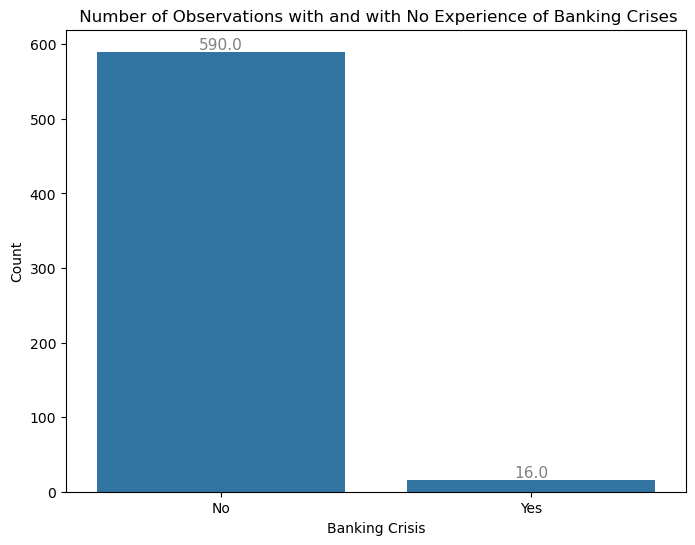

In [140]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = df_prep['LBC_2'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                textcoords='offset points')
plt.title(' Number of Observations with and with No Experience of Banking Crises')
plt.xlabel('Banking Crisis')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [142]:
## We use smote tech to upsample the minority class

smote = SMOTE(sampling_strategy = 'minority', random_state = 101)
X = df_prep.drop(columns = ['LBC_2'])
y = df_prep['LBC_2']
X_res, y_res = smote.fit_resample(X, y)
df_prep_res = pd.concat([X_res, y_res], axis = 1)

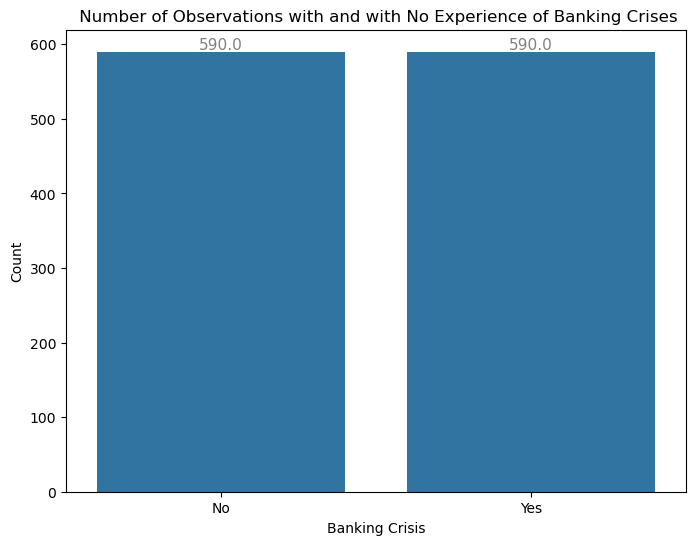

In [144]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = df_prep_res['LBC_2'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                textcoords='offset points')
plt.title(' Number of Observations with and with No Experience of Banking Crises')
plt.xlabel('Banking Crisis')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

## 2.3 Scale the X

In [147]:
## Using StandardScaler to Partial Normalize The X

partial_X = df_prep_res[['lag_GDPGR', 'lag_GDPPC', 'lag_IR', 'lag_XM', 'lag_M2R', 'lag_CPGDP', 'lag_CG', 'lag_CPG', 'lag_eqi', 'lag_eqo', 'lag_dbi', 'lag_dbo', 'lag_fii', 'lag_fio',
       'lag_kai', 'lag_kao']]
y = df_prep_res['LBC_2']

scalar = StandardScaler()
X_scaled = scalar.fit_transform(partial_X)


df_prep_scaled = pd.concat([df_prep_res[['lag_INS']], pd.DataFrame(X_scaled, columns = partial_X.columns), y], axis = 1)






In [206]:
model_test = logit("LBC_2 ~ lag_GDPGR + lag_GDPPC + lag_IR  + lag_XM + lag_CPGDP + lag_CG + lag_CPG +  lag_kai + lag_INS + lag_kai:lag_INS ", data=df_prep_scaled)
# result = model_test.fit_regularized(alpha=0.1, method='l1') # alpha = 0.1, method='l1' are examples only, adjust it for your need
result = model_test.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.443359
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  LBC_2   No. Observations:                 1180
Model:                          Logit   Df Residuals:                     1169
Method:                           MLE   Df Model:                           10
Date:                Sun, 11 May 2025   Pseudo R-squ.:                  0.3604
Time:                        17:38:46   Log-Likelihood:                -523.16
converged:                       True   LL-Null:                       -817.91
Covariance Type:            nonrobust   LLR p-value:                3.128e-120
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2912      0.329      0.886      0.376      -0.353       0.935
lag_GDPGR     

In [277]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', solver='liblinear')  # liblinear supports small data
model.fit(X, y)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [271]:
df_prep['lag_kai:lag_INS'] = df_prep['lag_kai'] * df_prep['lag_INS']

In [273]:
df_prep.columns

Index(['LBC_2', 'lag_eqi', 'lag_eqo', 'lag_dbi', 'lag_dbo', 'lag_fii',
       'lag_fio', 'lag_kai', 'lag_kao', 'lag_INS', 'lag_GDPGR', 'lag_GDPPC',
       'lag_IR', 'lag_XM', 'lag_M2R', 'lag_CPGDP', 'lag_CG', 'lag_CPG',
       'lag_kai:lag_INS'],
      dtype='object')

In [275]:
X = df_prep[['lag_kai','lag_INS', 'lag_GDPGR', 'lag_GDPPC',
       'lag_IR', 'lag_XM', 'lag_CPGDP', 'lag_CG', 'lag_CPG', 'lag_kai:lag_INS']]
y = df_prep['LBC_2']

In [279]:
print(model)

LogisticRegression(class_weight='balanced', solver='liblinear')


In [281]:
 model.coef_[0]

array([ 3.92107801e+00,  2.75606318e-01, -1.32305958e-01, -7.76682976e-05,
        2.13008533e-02, -1.79162931e-01,  1.89754421e-02, -1.71240159e-02,
        1.26771237e-01, -1.39099228e+00])

In [283]:
from scipy.stats import norm

# Get model coefficients and intercept
coefs = np.concatenate([model.intercept_, model.coef_.flatten()])

# Add intercept column to X
X_design = np.hstack((np.ones((X.shape[0], 1)), X.values))

# Predicted probabilities
preds = model.predict_proba(X)[:, 1]

# Diagonal weight matrix
V = np.diag(preds * (1 - preds))

# Hessian approximation: (X'VX)^-1
cov_matrix = np.linalg.inv(X_design.T @ V @ X_design)

# Standard errors
standard_errors = np.sqrt(np.diag(cov_matrix))

# Wald z-scores
z_scores = coefs / standard_errors

# Two-tailed p-values
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))

# Odds ratios
odds_ratios = np.exp(coefs)

# Variable names (add intercept manually)
var_names = ['Intercept'] + list(X.columns)

# Combine into DataFrame
results_df = pd.DataFrame({
    'Variable': var_names,
    'Coefficient': coefs,
    'Std. Error': standard_errors,
    'z': z_scores,
    'P>|z|': p_values,
    'Odds Ratio': odds_ratios
}).round(4)

In [285]:
results_df

,Variable,Coefficient,Std. Error,z,P>|z|,Odds Ratio
0,Intercept,-2.3588,0.5697,-4.1406,0.0000,0.0945
1,lag_kai,3.9211,0.9418,4.1635,0.0000,50.4548
2,lag_INS,0.2756,0.2204,1.2505,0.2111,1.3173
3,lag_GDPGR,-0.1323,0.0283,-4.6691,0.0000,0.8761
4,lag_GDPPC,-0.0001,0.0000,-3.1962,0.0014,0.9999
5,lag_IR,0.0213,0.0091,2.3472,0.0189,1.0215
6,lag_XM,-0.1792,0.0265,-6.7698,0.0000,0.8360
7,lag_CPGDP,0.0190,0.0043,4.4463,0.0000,1.0192
8,lag_CG,-0.0171,0.0140,-1.2232,0.2213,0.9830
9,lag_CPG,0.1268,0.0272,4.6545,0.0000,1.1352
